In [1]:
#import packages 

import pandas as pd
import numpy as np
import xlrd   #for excel xls file 
import xlwt    #for excel xls file 


import matplotlib.pyplot as pp
import zipfile
import os
import string
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns  



In [2]:
#import military spending work book 

militaryspendingraw = pd.ExcelFile('Military_Spending.xlsx')

#select workbook sheet, specifiy columns, remove the titel rows
MS = pd.read_excel(militaryspendingraw, 'Current USD',header = 5, usecols = "A,BI:BR")  
GDP = pd.read_excel(militaryspendingraw, 'Share of GDP',header = 5, usecols = "A,BI:BR")
PC = pd.read_excel(militaryspendingraw, 'Per capita',header = 5, usecols = "A,V:AE")

#index by country
MS_indexed = MS.set_index('Country')
GDP_indexed = GDP.set_index('Country')
PC_indexed = PC.set_index('Country')

In [3]:
#import GDP and per capita worksheets

grossdomprod = pd.ExcelFile('GDP.xlsx')
GDP_total = pd.read_excel('GDP.xlsx', 'GDP')
GDP_percaptia = pd.read_excel('GDP.xlsx', 'GDP_PC')

#index by country 

GDP_total_indexed = GDP_total.set_index('Country')
GDP_percaptia_indexed = GDP_percaptia.set_index('Country')

In [4]:
#military speding wrokbook column headers are not reading properly
#set column headers to string 
#need to do this so that colummn names can be read more easily with python 

MS.columns = MS.columns.astype(str)
MS.columns.map(str)

GDP.columns = GDP.columns.astype(str)
GDP.columns.map(str)

PC.columns = PC.columns.astype(str)
PC.columns.map(str)

GDP_total.columns=GDP_total.columns.astype(str)
GDP_total.columns.map(str)

GDP_percaptia.columns=GDP_percaptia.columns.astype(str)
GDP_percaptia.columns.map(str)

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [5]:
#verify that headers are being read correctly 
list(GDP_total)

['Country',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [6]:
#clean data 
#Drop NA, use inplace becuase of object data type 

MS.dropna(inplace=True)
GDP.dropna(inplace=True)
PC.dropna(inplace=True)


In [7]:
#remove rows with other N/A text 


MSC = MS[(MS["2007"] != ". .") & 
   (MS["2008"] != ". .") &
   (MS["2009"] != ". .") &
   (MS["2010"] != ". .") &
   (MS["2011"] != ". .") & 
   (MS["2012"] != ". .") &
   (MS["2013"] != ". .") &
   (MS["2014"] != ". .") &
   (MS["2015"] != ". .") &
   (MS["2016"] != ". .") &
   (MS["2007"] != "xxx") & 
   (MS["2008"] != "xxx") &
   (MS["2009"] != "xxx") &
   (MS["2010"] != "xxx") &
   (MS["2011"] != "xxx") & 
   (MS["2012"] != "xxx") &
   (MS["2013"] != "xxx") &
   (MS["2014"] != "xxx") &
   (MS["2015"] != "xxx") &
   (MS["2016"] != "xxx")]
MSC;

GDPC = GDP[(GDP["2007"] != ". .") & 
   (GDP["2008"] != ". .") &
   (GDP["2009"] != ". .") &
   (GDP["2010"] != ". .") &
   (GDP["2011"] != ". .") & 
   (GDP["2012"] != ". .") &
   (GDP["2013"] != ". .") &
   (GDP["2014"] != ". .") &
   (GDP["2015"] != ". .") &
   (GDP["2016"] != ". .") &
   (GDP["2007"] != "xxx") & 
   (GDP["2008"] != "xxx") &
   (GDP["2009"] != "xxx") &
   (GDP["2010"] != "xxx") &
   (GDP["2011"] != "xxx") & 
   (GDP["2012"] != "xxx") &
   (GDP["2013"] != "xxx") &
   (GDP["2014"] != "xxx") &
   (GDP["2015"] != "xxx") &
   (GDP["2016"] != "xxx")]

GDPC; #remove the ; to see the table results

PCC = PC[(PC["2007"] != ". .") & 
   (PC["2008"] != ". .") &
   (PC["2009"] != ". .") &
   (PC["2010"] != ". .") &
   (PC["2011"] != ". .") & 
   (PC["2012"] != ". .") &
   (PC["2013"] != ". .") &
   (PC["2014"] != ". .") &
   (PC["2015"] != ". .") &
   (PC["2016"] != ". .") &
   (PC["2007"] != "xxx") & 
   (PC["2008"] != "xxx") &
   (PC["2009"] != "xxx") &
   (PC["2010"] != "xxx") &
   (PC["2011"] != "xxx") & 
   (PC["2012"] != "xxx") &
   (PC["2013"] != "xxx") &
   (PC["2014"] != "xxx") &
   (PC["2015"] != "xxx") &
   (PC["2016"] != "xxx")]

PCC; #remove the ; to see the table results



In [8]:
#convert data types in columns to float (float b/c decimals)
MSC[['2007','2008','2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']] = MSC[['2007','2008','2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].apply(pd.to_numeric)

GDPC[['2007','2008','2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']] = GDPC[['2007','2008','2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].apply(pd.to_numeric)

PCC[['2007','2008','2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']] = PCC[['2007','2008','2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].apply(pd.to_numeric)

C:\Users\Allegra\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [9]:
#Verify data types are float so that we dan do analysis against the data 

MSC.dtypes
GDPC.dtypes
PCC.dtypes

Country     object
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
dtype: object

In [10]:
#find top ten countries in military spending based on 2016 year end totals, listed in desc order  
#values in milions of US$

TT=MSC.sort_values('2016', ascending=False).head(10)
TTR= TT.round(2) #round the values to 2 decimals - needed to fix after changing to neumeric 

TTR;


In [11]:
#round GDP
GTT= GDPC.round(2) #round the values to 2 decimals - needed to fix after changing to neumeric 
GTT;

In [12]:
#round values of per-person military $ to 2 decimal places 
PCC_round= PCC.round(2)
PCC_round;

In [13]:
#round values of per capita GDP to 2 decimal places 
GDP_percaptia_round= GDP_percaptia.round(2)
GDP_percaptia_round;

In [14]:
#Join GDP on military spending 
#TTR.Join=(GTT, lsuffix='_TTR', rsuffix='_GTT')

TTR_Join=pd.merge(TTR, GTT, on='Country', how='inner')
TTR_Join;


In [15]:
#Join TRR(top countries in military $) on GDP_total (top 10 countries total GDP in us billions$)

TTR_Join_GDP=pd.merge(TTR, GDP_total, on='Country', how='inner')



In [16]:
#Join TRR(top countries in military $) on PCC (the cleaned per capita military spending)
# this limits the PCC table to the same top 10 kfound in TRR and will reorder the values for visualization consistancy 

TTR_Join_PCC=pd.merge(TTR, PCC_round, on='Country', how='inner') #inner join to get rid of other rows that are not the top 10

TTR_Join_PCC;

In [17]:
#join TRR and GDP per capita (GDP_percaptia)
#inner join to get rid of other rows that are not the top 10
TTR_Join_gdpperperson=pd.merge(TTR, GDP_percaptia_round, on='Country', how='inner') 

TTR_Join_gdpperperson;

In [18]:
#new table for just top 10 in MS $ for per person MS$

ms_pp = TTR_Join_PCC[['Country', '2012_y', '2013_y', '2014_y', '2015_y','2016_y']]

ms_pp.columns=['Country', 'mspp_2012', 'mspp_2013', 'mspp_2014', 'mspp_2015', 'mspp_2016' ]

ms_pp

,Country,mspp_2012,mspp_2013,mspp_2014,mspp_2015,mspp_2016
0,USA,2175.29,2017.13,1909.27,1852.26,1886.16
1,"China, P.R.",116.12,132.02,146.61,155.59,155.74
2,Saudi Arabia,1915.44,2219.13,2614.81,2764.26,1978.19
3,India,37.37,37.05,39.31,39.13,42.14
4,France,944.52,977.64,992.08,859.41,862.36
5,UK,920.12,889.08,919.97,832.29,741.31
6,Japan,472.01,386.06,367.80,324.74,365.40
7,Germany,577.44,570.10,571.67,493.41,509.33
8,"Korea, South",644.08,689.19,744.62,724.40,728.80


In [19]:
#new table for just top 10 in MS $ for per person GDP
gdp_pp = TTR_Join_gdpperperson[['Country', '2012_y', '2013_y', '2014_y', '2015_y','2016_y']]

gdp_pp.columns=['Country', 'gdp_2012', 'gdp_2013', 'gdp_2014', 'gdp_2015', 'gdp_2016' ]

gdp_pp

,Country,gdp_2012,gdp_2013,gdp_2014,gdp_2015,gdp_2016
0,USA,51403.39,52741.73,54668.08,56436.71,57607.61
1,"China, P.R.",6329.46,7080.83,7701.69,8166.76,8123.26
2,Russian Federation,15425.31,16022.65,14388.00,9521.08,8945.64
3,Saudi Arabia,25208.16,24892.99,24580.47,21094.59,20365.00
4,India,1481.56,1485.60,1607.41,1629.00,1741.65
5,France,42333.09,44104.92,44571.66,37840.08,38177.86
6,UK,41683.66,42452.95,46478.84,43976.42,40049.78
7,Japan,48632.91,40490.16,38143.11,34493.26,38882.64
8,Germany,44089.55,46545.38,48118.74,41344.65,42176.85
9,"Korea, South",24358.78,25890.02,27811.37,27105.08,27534.84


In [20]:
#transpose GDP and per person military spending data 

gdp_pp_transposed = gdp_pp.set_index(['Country']).transpose()
ms_pp_transposed = ms_pp.set_index(['Country']).transpose()

ms_pp_transposed
gdp_pp_transposed

Country,USA,"China, P.R.",Russian Federation,Saudi Arabia,India,France,UK,Japan,Germany,"Korea, South"
gdp_2012,51403.39,6329.46,15425.31,25208.16,1481.56,42333.09,41683.66,48632.91,44089.55,24358.78
gdp_2013,52741.73,7080.83,16022.65,24892.99,1485.60,44104.92,42452.95,40490.16,46545.38,25890.02
gdp_2014,54668.08,7701.69,14388.00,24580.47,1607.41,44571.66,46478.84,38143.11,48118.74,27811.37
gdp_2015,56436.71,8166.76,9521.08,21094.59,1629.00,37840.08,43976.42,34493.26,41344.65,27105.08
gdp_2016,57607.61,8123.26,8945.64,20365.00,1741.65,38177.86,40049.78,38882.64,42176.85,27534.84


In [21]:
#get mean values for per person GDP and per person military spending 
msdescribe=ms_pp_transposed.describe()
gdpdescribe=gdp_pp_transposed.describe()

#drop the rows we dont need
msperpersonavg = msdescribe.drop(['count', 'std','min','25%','50%','75%','max'])

gdpdescribeavg = gdpdescribe.drop(['count', 'std','min','25%','50%','75%','max'])

test_join = msperpersonavg.append(gdpdescribeavg)
test_join['Russian Federation'].fillna(628.55, inplace=True) #fix NaN value for Russia 

#both tables had rows with same name, need to clean this up 
test_join['Mean']=['Per Person Military Spending','Per Person GDP'] 

#and then re-index off the new mean column 
test_join.set_index('Mean' , inplace=True)



test_join


,"China, P.R.",France,Germany,India,Japan,"Korea, South",Russian Federation,Saudi Arabia,UK,USA
Mean,,,,,,,,,,
Per Person Military Spending,141.216,927.202,544.390,39.000,383.202,706.218,628.550,2298.366,860.554,1968.022
Per Person GDP,7480.400,41405.522,44455.034,1589.044,40128.416,26540.018,12860.536,23228.242,42928.330,54571.504


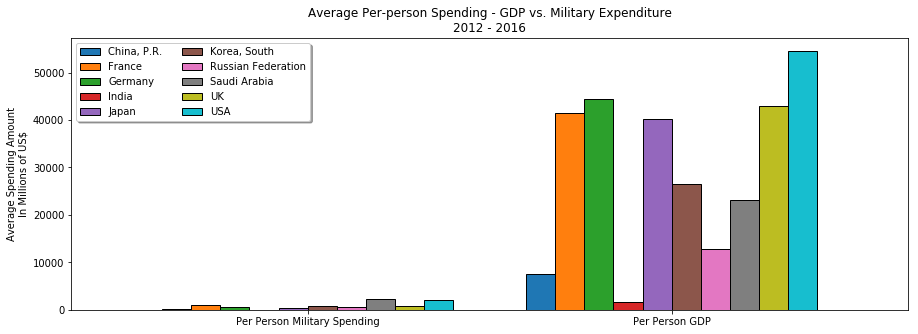

In [22]:
#graph the average per person GDP and the per person military spending 
test_join_plot= test_join.plot(kind='bar',legend=True,figsize=(15,5), width=.8,edgecolor='black',  #edge color adds border to black 
                               title = 'Average Per-person Spending - GDP vs. Military Expenditure'"\n"'2012 - 2016')
pp.xticks(rotation=0) #rotate the labes on the graph 

#move and reformat the legend 
pp.legend(loc='upper left', 
          shadow=True, ncol=2) 

#lable the x,y axis 
test_join_plot.set_xlabel('')
test_join_plot.set_ylabel('Average Spending Amount'"\n"'In Millions of US$')

#save the graph
pp.savefig("GDPvsMSPP.png",bbox_inches="tight",transparent=True)


In [23]:
#Join the subset tables 
perperson_merge=pd.merge(ms_pp, gdp_pp, on='Country', how='inner') 
perperson_merge

,Country,mspp_2012,mspp_2013,mspp_2014,mspp_2015,mspp_2016,gdp_2012,gdp_2013,gdp_2014,gdp_2015,gdp_2016
0,USA,2175.29,2017.13,1909.27,1852.26,1886.16,51403.39,52741.73,54668.08,56436.71,57607.61
1,"China, P.R.",116.12,132.02,146.61,155.59,155.74,6329.46,7080.83,7701.69,8166.76,8123.26
2,Saudi Arabia,1915.44,2219.13,2614.81,2764.26,1978.19,25208.16,24892.99,24580.47,21094.59,20365.00
3,India,37.37,37.05,39.31,39.13,42.14,1481.56,1485.60,1607.41,1629.00,1741.65
4,France,944.52,977.64,992.08,859.41,862.36,42333.09,44104.92,44571.66,37840.08,38177.86
5,UK,920.12,889.08,919.97,832.29,741.31,41683.66,42452.95,46478.84,43976.42,40049.78
6,Japan,472.01,386.06,367.80,324.74,365.40,48632.91,40490.16,38143.11,34493.26,38882.64
7,Germany,577.44,570.10,571.67,493.41,509.33,44089.55,46545.38,48118.74,41344.65,42176.85
8,"Korea, South",644.08,689.19,744.62,724.40,728.80,24358.78,25890.02,27811.37,27105.08,27534.84


Text(0,0.5,'Spending in US$')

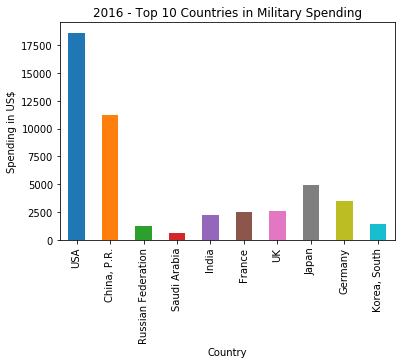

In [24]:
#show graph of 2016 military spending by top 10 spenders 
plot1=TTR_Join_GDP.plot(kind='bar', x='Country', y='2016_y',legend=False,
        title = '2016 - Top 10 Countries in Military Spending')
plot1.set_xlabel('Country')
plot1.set_ylabel('Spending in US$')

C:\Users\Allegra\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



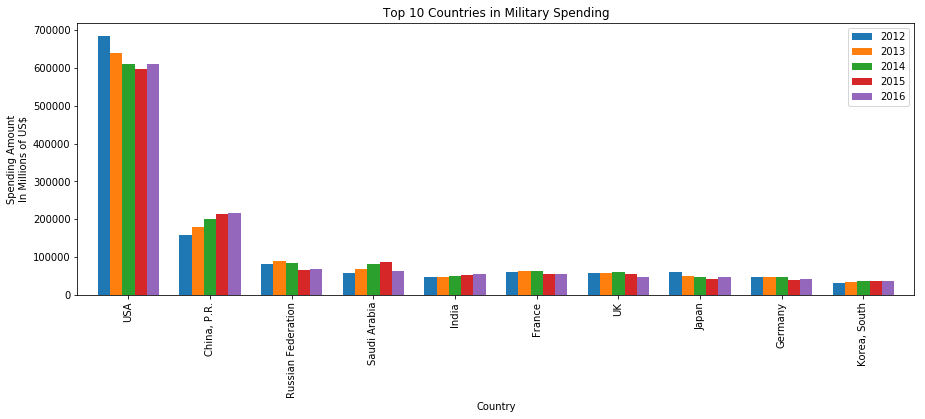

In [25]:
#Graph of the top 10 countries in military spending 
plot1=TTR.plot(kind='bar', figsize=(15,5),width=.75, x='Country', y=["2012","2013","2014","2015","2016"],legend=True,
        title = 'Top 10 Countries in Military Spending')
plot1.set_xlabel('Country')
plot1.set_ylabel('Spending Amount'"\n"'In Millions of US$')

#save the graph
pp.savefig("top10spending.png",bbox_inches="tight",transparent=True)



In [26]:
#transpose military spending data 
TTR_transposed = TTR.set_index(['Country']).transpose()
TTR_transposed

Country,USA,"China, P.R.",Russian Federation,Saudi Arabia,India,France,UK,Japan,Germany,"Korea, South"
2007,556961.00,68011.56,43534.99,35469.51,28254.77,60594.99,65986.09,40530.05,42551.85,27726.13
2008,621131.00,86362.10,56183.79,38222.93,33002.38,66009.45,65619.45,46361.47,48081.44,26072.41
2009,668567.00,105644.21,51532.12,41267.20,38722.15,66884.03,57914.63,51465.16,47470.07,24575.66
2010,698180.00,115711.78,58720.23,45244.53,46090.45,61781.75,58082.85,54655.45,46255.52,28175.18
2011,711338.00,137967.30,70237.52,48530.93,49633.82,64600.93,60270.44,60762.21,48140.35,30991.71
2012,684780.00,157390.38,81469.40,56497.87,47216.92,60035.15,58495.66,60011.53,46470.87,31951.76
2013,639704.00,179880.45,88352.90,67020.00,47403.53,62417.10,56861.76,49023.93,45930.54,34354.11
2014,609914.00,200772.20,84696.50,80762.40,50914.11,63613.57,59182.86,46634.51,46102.67,37286.22
2015,596009.64,214093.07,66418.71,87185.87,51295.48,55342.13,53862.19,41103.23,39812.58,36432.68
2016,611186.44,215175.93,69245.31,63672.80,55923.17,55745.48,48252.52,46126.33,41067.46,36776.73


In [27]:
#get stats of TTR_transposed data 
TTR_transposed.describe()


Country,USA,"China, P.R.",Russian Federation,Saudi Arabia,India,France,UK,Japan,Germany,"Korea, South"
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,639777.108000,148100.898000,67039.147000,56387.404000,44845.678000,61702.458000,58452.84500,49667.387000,45188.335000,31434.259000
std,49684.549836,53649.918202,14793.874517,17922.183746,8761.007865,3914.575589,5164.27128,7056.324321,2968.217311,4677.635499
min,556961.000000,68011.560000,43534.990000,35469.510000,28254.770000,55342.130000,48252.52000,40530.050000,39812.580000,24575.660000
25%,610232.110000,108161.102500,56817.900000,42261.532500,40564.225000,60175.110000,57124.97750,46185.115000,43396.522500,27838.392500
50%,630417.500000,147678.840000,67832.010000,52514.400000,47310.225000,62099.425000,58289.25500,47829.220000,46179.095000,31471.735000
75%,680726.750000,195549.262500,78661.430000,66183.200000,50594.037500,64354.090000,59998.54500,53857.877500,47220.270000,35913.037500
max,711338.000000,215175.930000,88352.900000,87185.870000,55923.170000,66884.030000,65986.09000,60762.210000,48140.350000,37286.220000


In [28]:

# total GDP is  GDP_total
#total military spending TTR

#transpose total GDP data 
GDP_total_transposed = GDP_total.set_index(['Country']).transpose()

#reorder the fields to match the total MS$
GDP_total_transposed_reorder = GDP_total_transposed[['USA', 'China, P.R.','Russian Federation','Saudi Arabia','India','France','UK','Japan','Germany','Korea, South']]
GDP_total_transposed_reorder

Country,USA,"China, P.R.",Russian Federation,Saudi Arabia,India,France,UK,Japan,Germany,"Korea, South"
2007,14477.625,3571.451,1396.475,415.687,1238.700,2666.805,3064.351,4515.264,3444.723,1122.679
2008,14718.575,4604.285,1784.514,519.797,1224.096,2937.321,2898.941,5037.910,3770.150,1002.219
2009,14418.725,5121.681,1313.681,429.098,1365.373,2700.658,2377.160,5231.384,3426.672,901.935
2010,14964.400,6066.351,1638.463,526.811,1708.460,2651.772,2431.169,5700.099,3423.466,1094.499
2011,15517.925,7522.103,2051.657,671.239,1823.052,2865.304,2611.108,6157.460,3761.142,1202.464
2012,16155.250,8570.348,2210.255,735.975,1827.637,2682.901,2655.458,6203.213,3545.946,1222.807
2013,16691.500,9635.025,2297.125,746.647,1856.721,2809.390,2721.489,5155.716,3753.687,1305.605
2014,17427.600,10534.526,2063.663,756.350,2035.393,2853.832,3002.394,4848.733,3896.788,1411.334
2015,18120.700,11226.186,1365.865,654.270,2089.867,2434.787,2863.304,4379.868,3377.310,1382.764
2016,18624.450,11232.108,1283.162,646.438,2263.792,2466.472,2629.188,4936.543,3479.232,1411.042


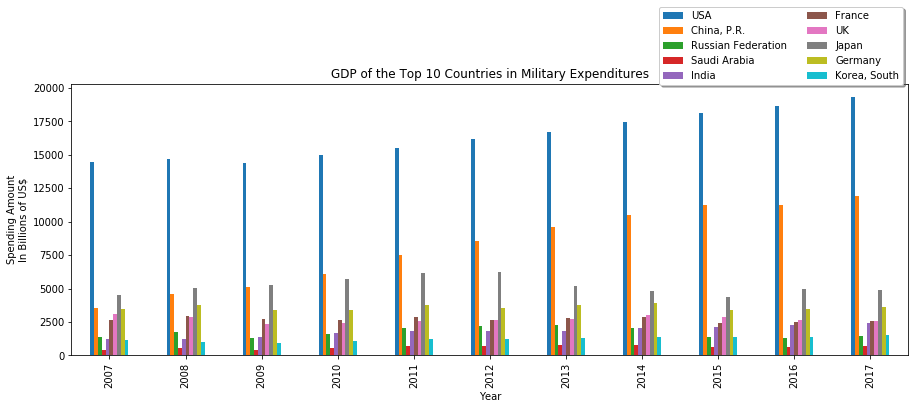

In [29]:
#graph the total contry GDP 

TotalGDPPlot =GDP_total_transposed_reorder.plot(kind = 'bar',legend=True,figsize=(15,5))

pp.title( 'GDP of the Top 10 Countries in Military Expenditures')
pp.legend(loc='upper right',bbox_to_anchor=(1, 1.3), #move the legend 
          shadow=True, ncol=2) 
TotalGDPPlot.set_xlabel('Year')
TotalGDPPlot.set_ylabel('Spending Amount'"\n"'In Billions of US$')

#save the graph
pp.savefig("GDP_total.png",bbox_inches="tight",transparent=True)


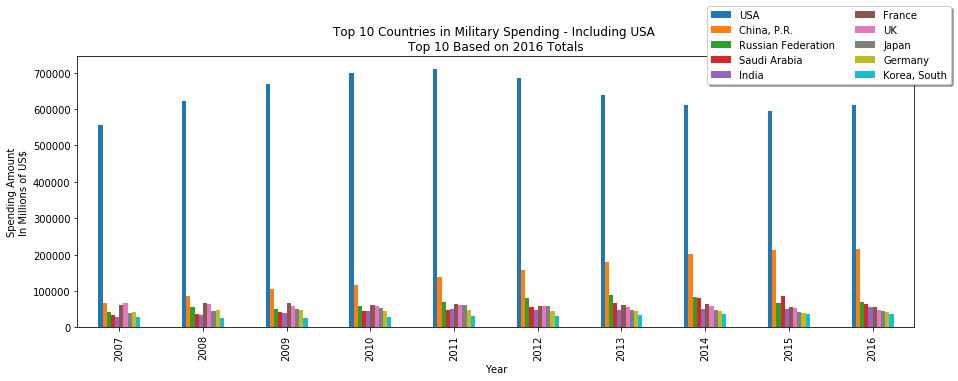

In [30]:
#graph of top 10 countries based on the 2016 standings - use transposed data 

toptenplot =TTR_transposed.plot(kind = 'bar',legend=True,figsize=(15,5))

pp.title( 'Top 10 Countries in Military Spending - Including USA '"\n"'Top 10 Based on 2016 Totals')
pp.legend(loc='upper right',bbox_to_anchor=(1.05, 1.2), #move the legend 
          shadow=True, ncol=2) 
toptenplot.set_xlabel('Year')
toptenplot.set_ylabel('Spending Amount'"\n"'In Millions of US$')

pp.savefig("top10_withUSA.png",bbox_inches="tight",transparent=True)

In [31]:
#calculate the percentage chnage year over year of the top 10 
percentchangeMS = TTR_transposed.pct_change(periods=1, fill_method='pad', limit=None, freq=None)

percentchangeMS_round= percentchangeMS.round(2) #round the values to 2 decimals
percentchangeMS_round.dropna(inplace=True)  #drop the NA row 

#print the result 
percentchangeMS_round

Country,USA,"China, P.R.",Russian Federation,Saudi Arabia,India,France,UK,Japan,Germany,"Korea, South"
2008,0.12,0.27,0.29,0.08,0.17,0.09,-0.01,0.14,0.13,-0.06
2009,0.08,0.22,-0.08,0.08,0.17,0.01,-0.12,0.11,-0.01,-0.06
2010,0.04,0.10,0.14,0.10,0.19,-0.08,0.00,0.06,-0.03,0.15
2011,0.02,0.19,0.20,0.07,0.08,0.05,0.04,0.11,0.04,0.10
2012,-0.04,0.14,0.16,0.16,-0.05,-0.07,-0.03,-0.01,-0.03,0.03
2013,-0.07,0.14,0.08,0.19,0.00,0.04,-0.03,-0.18,-0.01,0.08
2014,-0.05,0.12,-0.04,0.21,0.07,0.02,0.04,-0.05,0.00,0.09
2015,-0.02,0.07,-0.22,0.08,0.01,-0.13,-0.09,-0.12,-0.14,-0.02
2016,0.03,0.01,0.04,-0.27,0.09,0.01,-0.10,0.12,0.03,0.01


In [32]:
#Determine the fastest growing coutries by mean of %change
percentchangeMS_round.describe()

Country,USA,"China, P.R.",Russian Federation,Saudi Arabia,India,France,UK,Japan,Germany,"Korea, South"
count,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.012222,0.14000,0.063333,0.077778,0.081111,-0.006667,-0.033333,0.020000,-0.002222,0.035556
std,0.063004,0.07874,0.157162,0.140693,0.084179,0.071239,0.058737,0.115974,0.071550,0.074349
min,-0.070000,0.01000,-0.220000,-0.270000,-0.050000,-0.130000,-0.120000,-0.180000,-0.140000,-0.060000
25%,-0.040000,0.10000,-0.040000,0.080000,0.010000,-0.070000,-0.090000,-0.050000,-0.030000,-0.020000
50%,0.020000,0.14000,0.080000,0.080000,0.080000,0.010000,-0.030000,0.060000,-0.010000,0.030000
75%,0.040000,0.19000,0.160000,0.160000,0.170000,0.040000,0.000000,0.110000,0.030000,0.090000
max,0.120000,0.27000,0.290000,0.210000,0.190000,0.090000,0.040000,0.140000,0.130000,0.150000


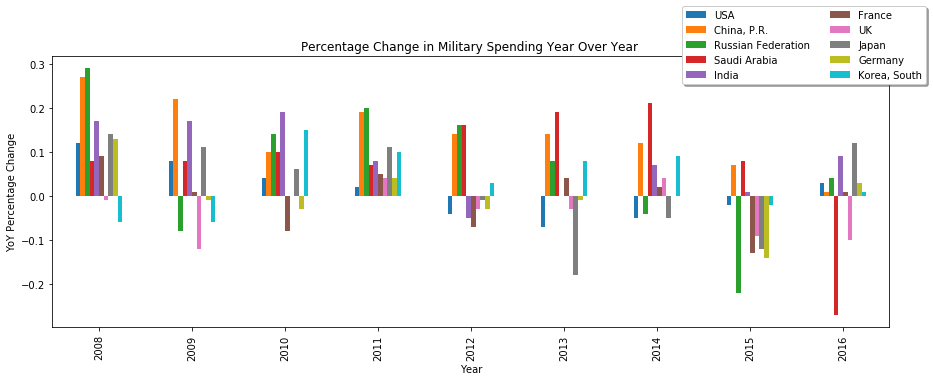

In [33]:
#graph the percentage changes 

percentchangeplot = percentchangeMS_round.plot(kind = 'bar',legend=True,figsize=(15,5))
pp.title( 'Percentage Change in Military Spending Year Over Year ')
pp.legend(loc='upper right',bbox_to_anchor=(1.05, 1.2), #move the legend 
          shadow=True, ncol=2) 
percentchangeplot.set_xlabel('Year')
percentchangeplot.set_ylabel('YoY Percentage Change')

#save the graph
pp.savefig("top10_percentagechage.png",bbox_inches="tight",transparent=True)

In [34]:
#calculate the $ amount change year over year 
amountchanged = TTR_transposed.diff()
amountchanged.dropna(inplace=True)  #drop the NA row 
amountchanged


Country,USA,"China, P.R.",Russian Federation,Saudi Arabia,India,France,UK,Japan,Germany,"Korea, South"
2008,64170.00,18350.54,12648.80,2753.42,4747.61,5414.46,-366.64,5831.42,5529.59,-1653.72
2009,47436.00,19282.11,-4651.67,3044.27,5719.77,874.58,-7704.82,5103.69,-611.37,-1496.75
2010,29613.00,10067.57,7188.11,3977.33,7368.30,-5102.28,168.22,3190.29,-1214.55,3599.52
2011,13158.00,22255.52,11517.29,3286.40,3543.37,2819.18,2187.59,6106.76,1884.83,2816.53
2012,-26558.00,19423.08,11231.88,7966.94,-2416.90,-4565.78,-1774.78,-750.68,-1669.48,960.05
2013,-45076.00,22490.07,6883.50,10522.13,186.61,2381.95,-1633.90,-10987.60,-540.33,2402.35
2014,-29790.00,20891.75,-3656.40,13742.40,3510.58,1196.47,2321.10,-2389.42,172.13,2932.11
2015,-13904.36,13320.87,-18277.79,6423.47,381.37,-8271.44,-5320.67,-5531.28,-6290.09,-853.54
2016,15176.80,1082.86,2826.60,-23513.07,4627.69,403.35,-5609.67,5023.10,1254.88,344.05


In [35]:
#determine fastest growing country 

amountchanged.describe()

Country,USA,"China, P.R.",Russian Federation,Saudi Arabia,India,France,UK,Japan,Germany,"Korea, South"
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,6025.048889,16351.596667,2856.702222,3133.698889,3074.266667,-538.834444,-1970.396667,621.808889,-164.932222,1005.622222
std,37315.543891,7044.292595,10133.327302,10678.566149,3098.471483,4443.818818,3541.808544,5988.223405,3161.916659,2027.933150
min,-45076.000000,1082.860000,-18277.790000,-23513.070000,-2416.900000,-8271.440000,-7704.820000,-10987.600000,-6290.090000,-1653.720000
25%,-26558.000000,13320.870000,-3656.400000,3044.270000,381.370000,-4565.780000,-5320.670000,-2389.420000,-1214.550000,-853.540000
50%,13158.000000,19282.110000,6883.500000,3977.330000,3543.370000,874.580000,-1633.900000,3190.290000,-540.330000,960.050000
75%,29613.000000,20891.750000,11231.880000,7966.940000,4747.610000,2381.950000,168.220000,5103.690000,1254.880000,2816.530000
max,64170.000000,22490.070000,12648.800000,13742.400000,7368.300000,5414.460000,2321.100000,6106.760000,5529.590000,3599.520000


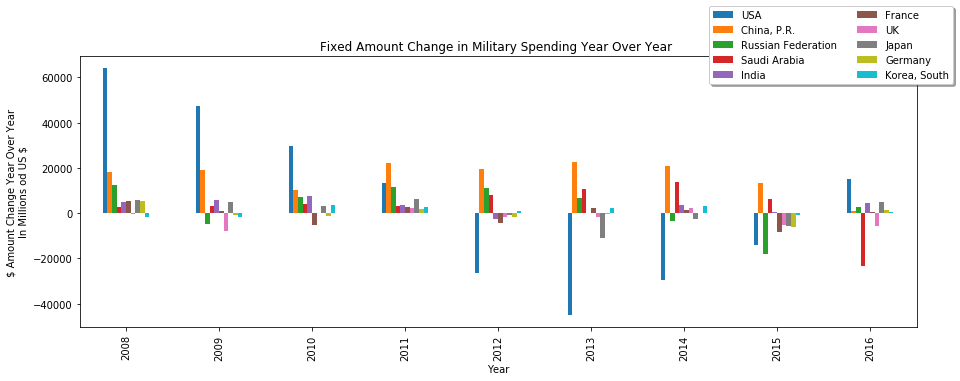

In [36]:
#graph the fixed amount change 
amountchangedplot = amountchanged.plot(kind = 'bar',legend=True,figsize=(15,5))
pp.title( 'Fixed Amount Change in Military Spending Year Over Year ')
pp.legend(loc='upper right',bbox_to_anchor=(1.05, 1.2), #move the legend 
          shadow=True, ncol=2) 
amountchangedplot.set_xlabel('Year')
amountchangedplot.set_ylabel('$ Amount Change Year Over Year'"\n"'In Millions od US $')

#save the graph
pp.savefig("top10_fixedchange.png",bbox_inches="tight",transparent=True)

In [37]:
#graohs from here down were my learning but didnt make it into the final presentation 

C:\Users\Allegra\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



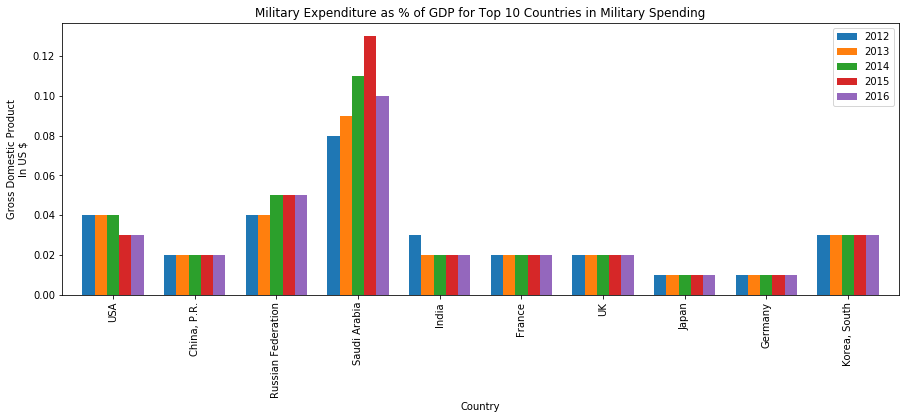

In [38]:

#Plot military spending as % of GDP of the top ten countries
#bar chart 
plot2=TTR_Join.plot(kind='bar', figsize=(15,5),width=.75, x='Country', y=["2012_y","2013_y","2014_y","2015_y","2016_y"],legend=True,
        title = 'Military Expenditure as % of GDP for Top 10 Countries in Military Spending')
pp.legend(['2012', '2013','2014','2015','2016']); #fix the ledgend 
plot2.set_xlabel('Country')
plot2.set_ylabel('Gross Domestic Product'"\n"'In US $')


#save a graphic of plot for use in power point
pp.savefig("GDP_as_percent.png")

C:\Users\Allegra\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



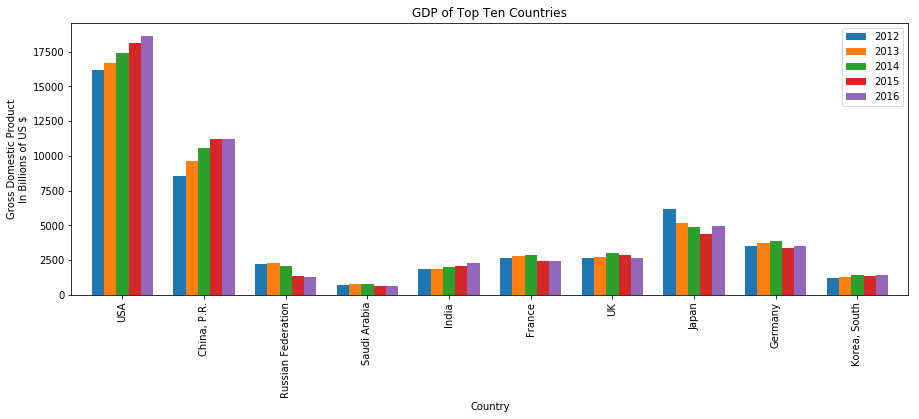

In [39]:
#Plot GDP of the top ten countries
plot3=TTR_Join_GDP.plot(kind='bar', figsize=(15,5),width=.75, x='Country', y=["2012_y","2013_y","2014_y","2015_y","2016_y"],legend=True,
        title = 'GDP of Top Ten Countries')
pp.legend(['2012', '2013','2014','2015','2016']); #fix the ledgend 
plot3.set_xlabel('Country')
plot3.set_ylabel('Gross Domestic Product'"\n"'In Billions of US $')


#save a graphic of plot for use in power point
pp.savefig("GDP.png",bbox_inches="tight",transparent=True)



In [40]:
# Calculate difference in per person military $ vs GDP per capita 
perperson_merge['diff_2012'] = perperson_merge['gdp_2012'] - perperson_merge['mspp_2012']
perperson_merge['diff_2013'] = perperson_merge['gdp_2013'] - perperson_merge['mspp_2013']
perperson_merge['diff_2014'] = perperson_merge['gdp_2014'] - perperson_merge['mspp_2014']
perperson_merge['diff_2015'] = perperson_merge['gdp_2015'] - perperson_merge['mspp_2015']
perperson_merge['diff_2016'] = perperson_merge['gdp_2016'] - perperson_merge['mspp_2016']

#create new table with difference in per person military $ vs GDP per capita 
diff_table = perperson_merge[['Country','diff_2012','diff_2013','diff_2014','diff_2015','diff_2016' ]]

#transpose data 
diff_transposed = diff_table.set_index(['Country']).transpose()


C:\Users\Allegra\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



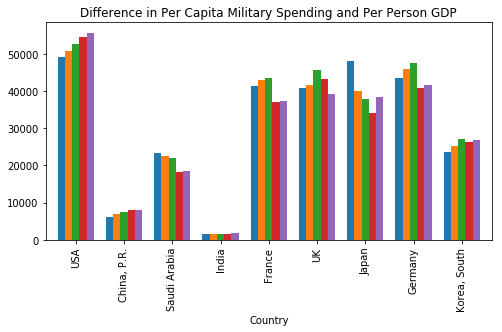

In [41]:
plot8=perperson_merge.plot(kind='bar', figsize=(8,4),width=.75, x='Country', y=['diff_2012','diff_2013', 'diff_2014', 'diff_2015',
                                                                               'diff_2016'],
                           legend=False,
        title = 'Difference in Per Capita Military Spending and Per Person GDP') 

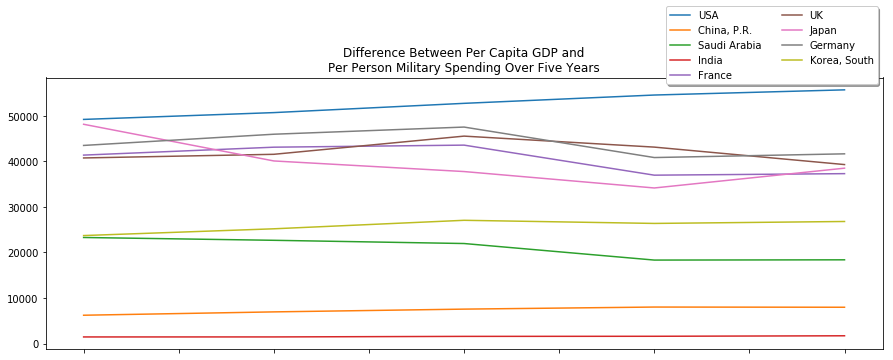

In [42]:
diff_transposed.plot(figsize=(15,5))
pp.title( 'Difference Between Per Capita GDP and'"\n"'Per Person Military Spending Over Five Years')
pp.legend(loc='upper right',bbox_to_anchor=(1, 1.28),
          shadow=True, ncol=2) 

pp.savefig("Difference.png",bbox_inches="tight",transparent=True)
